dataset: https://www.kaggle.com/datasets/sujaykapadnis/smoking

Mounted at /content/drive
Classes: ['not_smoking', 'smoking']


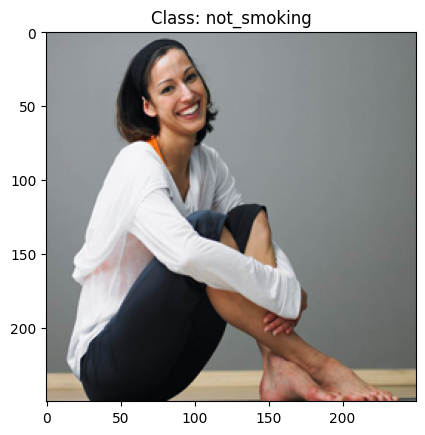

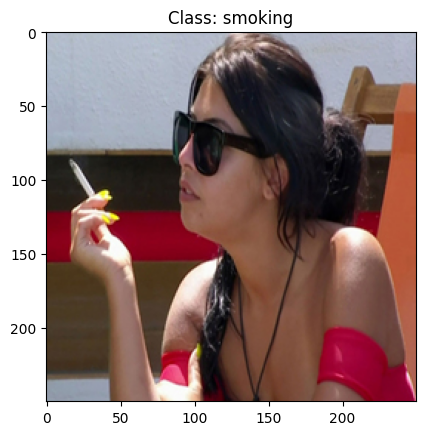

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from typing_extensions import dataclass_transform
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


dataset_path = '/content/drive/MyDrive/smoking_dataset'

classes = os.listdir(dataset_path)
print("Classes:", classes)

for cls in classes:
  class_path = os.path.join(dataset_path, cls)
  sample_img = os.listdir(class_path)[0]
  img = mpimg.imread(os.path.join(class_path, sample_img))
  plt.imshow(img)
  plt.title(f"Class: {cls}")
  plt.show()

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 180 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


In [3]:
from tensorflow.keras import models, layers

def build_alexnet(input_shape=(224, 224, 3), num_classes=3):
    model = models.Sequential()
    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((3, 3), strides=2))

    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((3, 3), strides=2))

    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [4]:
def build_vgg16(input_shape=(224, 224, 3), num_classes=3):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten and fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [11]:
# Compile the models
alexnet = build_alexnet(num_classes=2) # Set num_classes to 2
vgg16 = build_vgg16(num_classes=2)

alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#Train AlexNet
history_alexnet = alexnet.fit(train_generator, validation_data=val_generator, epochs=10)

# Train VGG16
history_vgg16 = vgg16.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.4714 - loss: 41.2873 - val_accuracy: 0.4773 - val_loss: 0.6955
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - accuracy: 0.5602 - loss: 0.6966 - val_accuracy: 0.5000 - val_loss: 1.4557
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 36s 6s/step - accuracy: 0.7653 - loss: 0.6198 - val_accuracy: 0.5000 - val_loss: 1.8593
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 6s/step - accuracy: 0.7629 - loss: 0.4966 - val_accuracy: 0.5000 - val_loss: 3.2505
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - accuracy: 0.7408 - loss: 0.5625 - val_accuracy: 0.5000 - val_loss: 4.4465
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.7735 - loss: 0.4704 - val_accuracy: 0.5000 - val_loss: 2.4254
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 6s/step - accuracy: 0.7880 - loss: 0.4617 - val_accuracy: 0.5000 - val_loss: 5.0033
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 6s/step - accuracy: 0.7744 - loss: 0.4088 - val_accuracy: 0.5455 - val_loss: 4.0249
Epoch 9

1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 8s/step
AlexNet Confusion Matrix:
 [[20  2]
 [20  2]]
AlexNet Classification Report:
               precision    recall  f1-score   support

           0     0.5000    0.9091    0.6452        22
           1     0.5000    0.0909    0.1538        22

    accuracy                         0.5000        44
   macro avg     0.5000    0.5000    0.3995        44
weighted avg     0.5000    0.5000    0.3995        44

VGG16 Confusion Matrix:
 [[ 0 22]
 [ 0 22]]
VGG16 Classification Report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.5000    1.0000    0.6667        22

    accuracy                         0.5000        44
   macro avg     0.2500    0.5000    0.3333        44
weighted avg     0.2500    0.5000    0.3333        44



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


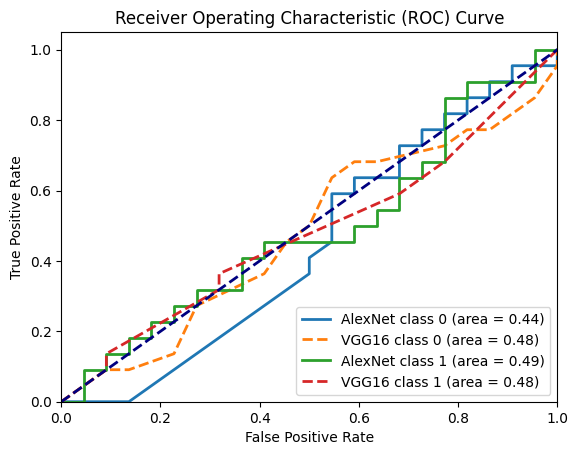

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.utils import to_categorical

# Assuming you have already trained your models (alexnet and vgg16)

# Generate predictions for the validation set
y_pred_alexnet = alexnet.predict(val_generator)
y_pred_vgg16 = vgg16.predict(val_generator)

# Get true labels for the validation set
y_true = val_generator.classes

# Convert predictions to class labels
y_pred_alexnet_classes = np.argmax(y_pred_alexnet, axis=1)
y_pred_vgg16_classes = np.argmax(y_pred_vgg16, axis=1)


# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  report = classification_report(y_true, y_pred, digits=4)
  return cm, report

# Calculate metrics for AlexNet
cm_alexnet, report_alexnet = calculate_metrics(y_true, y_pred_alexnet_classes)
print("AlexNet Confusion Matrix:\n", cm_alexnet)
print("AlexNet Classification Report:\n", report_alexnet)


# Calculate metrics for VGG16
cm_vgg16, report_vgg16 = calculate_metrics(y_true, y_pred_vgg16_classes)
print("VGG16 Confusion Matrix:\n", cm_vgg16)
print("VGG16 Classification Report:\n", report_vgg16)

# Function to calculate AUC-ROC for each class
def calculate_auc_roc(y_true, y_pred):
  y_true_one_hot = to_categorical(y_true)
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  n_classes = y_pred.shape[1]

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
  return fpr, tpr, roc_auc

# Calculate AUC-ROC for AlexNet
fpr_alexnet, tpr_alexnet, roc_auc_alexnet = calculate_auc_roc(y_true, y_pred_alexnet)

# Calculate AUC-ROC for VGG16
fpr_vgg16, tpr_vgg16, roc_auc_vgg16 = calculate_auc_roc(y_true, y_pred_vgg16)

# Plot AUC-ROC curves (optional)
plt.figure()
lw = 2
for i in range(len(classes)):
  plt.plot(fpr_alexnet[i], tpr_alexnet[i], lw=lw,
            label='AlexNet class {} (area = {:.2f})'.format(i, roc_auc_alexnet[i]))
  plt.plot(fpr_vgg16[i], tpr_vgg16[i], lw=lw, linestyle='--',
            label='VGG16 class {} (area = {:.2f})'.format(i, roc_auc_vgg16[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Misclassification rate is simply 1 - accuracy
# You can find accuracy in the classification report



Berdasarkan data performa dari AlexNet dan VGG16, ada beberapa hal yang bisa dipertimbangkan:

1. **AlexNet**:
   - **Precision dan Recall untuk kelas 0** cukup tinggi, terutama recall (0.9091), artinya model ini cukup baik dalam mendeteksi kelas 0. Namun, untuk kelas 1, recall sangat rendah (0.0909), menunjukkan bahwa model ini kurang bagus dalam mendeteksi kelas 1.
   - **Accuracy**: 50% dengan f1-score weighted hanya 0.3995 menunjukkan model ini belum optimal secara keseluruhan.

2. **VGG16**:
   - VGG16 memiliki hasil yang lebih ekstrem. Model ini tidak bisa mendeteksi kelas 0 sama sekali (semua prediksi diarahkan ke kelas 1), sehingga precision dan recall untuk kelas 0 adalah 0.
   - **Recall untuk kelas 1**: 1.0, artinya model ini bisa mendeteksi semua instance kelas 1, tetapi mengorbankan performa untuk kelas 0.
   - Sama seperti AlexNet, akurasi hanya 50%, tetapi f1-score weighted lebih rendah (0.3333), karena ketidakmampuan mendeteksi kelas 0.

**Rekomendasi**:
- Kedua model ini memiliki masalah dengan class imbalance atau kesulitan dalam membedakan antara kelas 0 dan 1 dengan baik. Sebelum mengganti model, coba lakukan beberapa **preprocessing** seperti:
   - **Oversampling atau undersampling** untuk menangani ketidakseimbangan kelas.
   - **Augmentasi data** agar lebih bervariasi.
   - **Regularisasi atau tuning hyperparameter**.

Jika harus memilih antara AlexNet dan VGG16 berdasarkan hasil yang diberikan, **AlexNet** adalah pilihan yang lebih baik karena beberapa alasan:

1. **AlexNet** memiliki **f1-score** yang lebih seimbang untuk kedua kelas (meskipun masih rendah untuk kelas 1). Untuk kelas 0, AlexNet memiliki **recall yang sangat tinggi (0.9091)**, artinya model ini dapat mendeteksi sebagian besar instance dari kelas 0 dengan baik.

2. **VGG16**, di sisi lain, gagal total dalam mendeteksi kelas 0 (precision dan recall 0 untuk kelas 0), dan hanya mampu mendeteksi kelas 1. Ini menunjukkan bahwa modelnya benar-benar mengabaikan satu kelas, yang jelas bukan performa yang diharapkan dalam kebanyakan kasus klasifikasi.

Secara keseluruhan, **AlexNet** lebih baik karena meskipun masih ada kelemahan dalam mendeteksi kelas 1, setidaknya mampu mengenali kedua kelas (walaupun dengan hasil yang kurang sempurna), sementara VGG16 hanya mengenali satu kelas.